<a href="https://colab.research.google.com/github/pablo-arantes/BIEN165/blob/main/Micromolecule_visualization_BIEN165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hello there!**

This is a Jupyter notebook to visualization of micromolecular systems using RDKit and py3dmol. This notebook is based on "***Making it rain: Cloud-based molecular simulations for everyone***" ([link here](https://doi.org/10.1021/acs.jcim.1c00998)). This notebook is part of BIEN 165 class of bioengineering course at University of California, Riverside.

Notebook created by [**Pablo R. Arantes**](https://pablo-arantes.github.io/)

The main goal of this notebook is to demonstrate the steps to visualize a micromolecular systems in a cheap and yet feasible fashion.

---


**Acknowledgments**

- A Making-it-rain  team, **Pablo R. Arantes** ([@pablitoarantes](https://twitter.com/pablitoarantes)), **Marcelo D. Polêto** ([@mdpoleto](https://twitter.com/mdpoleto)), **Conrado Pedebos** ([@ConradoPedebos](https://twitter.com/ConradoPedebos)) and **Rodrigo Ligabue-Braun** ([@ligabue_braun](https://twitter.com/ligabue_braun)).


- Also, credit to [David Koes](https://github.com/dkoes) for his awesome [py3Dmol](https://3dmol.csb.pitt.edu/) plugin.

- For related notebooks see: [Making-it-rain](https://github.com/pablo-arantes/making-it-rain)

# **Introduction**

In terms of inputs, we wil need:
*  A smile of your molecule.

In this notebook, we will visualize the acetaminophen molecule (**CC(=O)NC1=CC=C(C=C1)O**). To construct the 2D and 3D representations of acetaminophen, we will use the RDKit library. For visualizing the 3D molecule, we will employ py3Dmol.
## ---

# **Setting the environment**

Firstly, we need to install all necessary libraries and packages. The main packages we will be installing are:

1.    Anaconda (https://docs.conda.io/en/latest/miniconda.html)
2.    RDKit (https://www.rdkit.org/)
3.    py3Dmol (https://pypi.org/project/py3Dmol/)


In [4]:
#@title **Install dependencies**
# install dependencies
import subprocess
import sys
subprocess.run("pip -q install py3Dmol", shell=True)
subprocess.run("pip install rdkit", shell=True)


CompletedProcess(args='pip install rdkit', returncode=0)

Smiles: CC(=O)NC1=CC=C(C=C1)O


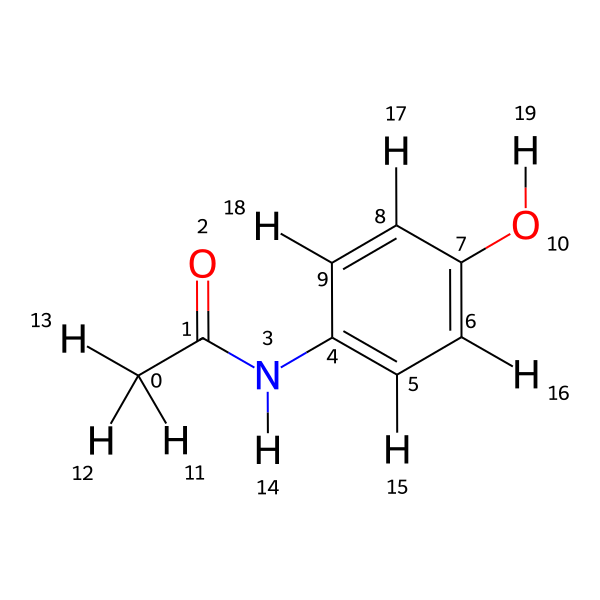

In [2]:
#@title **Please, provide the necessary information for the molecule**:

#@markdown Type the smiles of your molecule. **Ex: CC(=O)NC1=CC=C(C=C1)O**


#@markdown If you don't know the exactly smiles, please, check at https://pubchem.ncbi.nlm.nih.gov/
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdForceFieldHelpers
from IPython.display import SVG
import ipywidgets as widgets
import rdkit
from rdkit.Chem.Draw import IPythonConsole
AllChem.SetPreferCoordGen(True)
from IPython.display import Image
import os

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

import py3Dmol



smiles = 'CC(=O)NC1=CC=C(C=C1)O' #@param {type:"string"}
workDir = "/content/"


Smiles = smiles
smiles_fig = Chem.MolFromSmiles(Smiles)
hmol = Chem.AddHs(smiles_fig)



original_stdout = sys.stdout # Save a reference to the original standard output
final_smiles = '/content/smiles.smi'
with open(final_smiles, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(Smiles, ' ')
    sys.stdout = original_stdout

d2d = rdMolDraw2D.MolDraw2DSVG(600, 600)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(hmol)
d2d.FinishDrawing()
svg = d2d.GetDrawingText()
with open('smiles.svg', 'w') as f:
    f.write(svg)
print("Smiles: " + str(Smiles))
SVG(svg)

In [5]:
#@title **Show 3D structure of your molecule**:


mol = Chem.MolFromSmiles(Smiles)
new_match = hmol.GetSubstructMatch(mol)
hmol = Chem.AddHs(mol)
AllChem.EmbedMolecule(hmol)
mp = rdForceFieldHelpers.MMFFGetMoleculeProperties(hmol)
ff = rdForceFieldHelpers.MMFFGetMoleculeForceField(hmol, mp)
AllChem.OptimizeMolecule(ff, maxIters=200)
ff.Minimize()
AllChem.MolToMolFile(hmol, (os.path.join(workDir, "smiles_min.mol")))
AllChem.MolToPDBFile(hmol, (os.path.join(workDir, "smiles_min.pdb")))
mol_end = mol_with_atom_index(hmol)
IPythonConsole.drawMol3D(hmol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.